# VF analiza prigušnice za zajedničke smetnje (eng. common-mode choke)

Nadomjesna shema za VF analizu prigušnice za zajedničke smetnje:

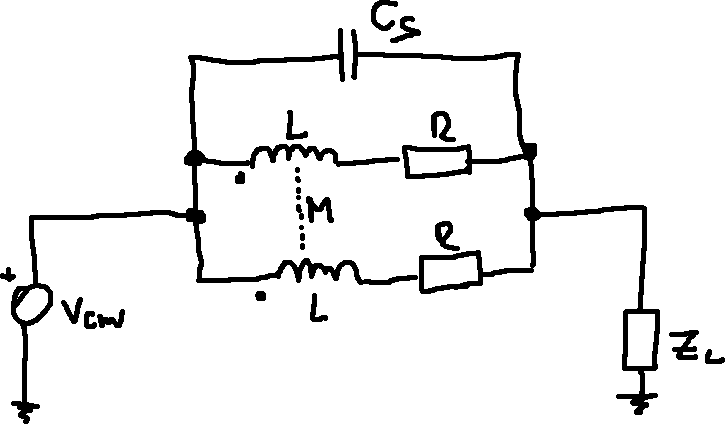

gdje $Z_L$ predstavlja zajedničku impedanciju kabela najčešće u iznosu $35$ $\Omega$ do $350$ $\Omega$.

Uneseni gubici za zajedničke (CM) smetnje (Ott pp. 152):

$IL=Z_L\sqrt{\frac{\left[2R(1-\omega^2LC_s) \right]^2+R^4(\omega C_s)^2}{\left[ R^2+2R(Z_L-\omega^2LC_SZ_L)\right]^2+\left[2R\omega L +\omega C_SR^2Z_L \right]^2}}$

In [4]:
def IL_CM(CS,ZL,L,f,R):
    # insertion loss for CM
    omega = 2*np.pi*f
    nom = (2*R*(1-omega**2*L*CS))**2+R**4*(omega*CS)**2
    den = (R**2+2*R*(ZL-omega**2*L*CS*ZL))**2+(2*R*omega*L+omega*CS*R**2*ZL)**2       
    IL_CMval = ZL*np.sqrt(nom/den)    
    return -20*np.log10(np.abs(IL_CMval))

In [13]:
%matplotlib inline
from ipywidgets import widgets
from ipywidgets import Layout
import numpy as np
import matplotlib.pyplot as plt

style = {'description_width': '150px'}
fmin = widgets.FloatLogSlider(min=1, max=7, step=1, value=1e7,description='$f_{min}$ [Hz]:',style=style,layout=Layout(width='75%'), continuous_update=False)
fmax = widgets.FloatLogSlider(min=8, max=10, step=1, value=100e6,description='$f_{max}$ [Hz]:',style=style,layout=Layout(width='75%'), continuous_update=False)
ymin = widgets.FloatSlider(min=0,max=20, step=1, value=0,description='plot $y_{min}$:',readout_format='.4f',style=style,layout=Layout(width='75%'), continuous_update=False)
ymax = widgets.FloatSlider(min=30,max=100, step=1, value=40,description='plot $y_{max}$:',readout_format='.1f',style=style,layout=Layout(width='75%'), continuous_update=False)

sCS = widgets.FloatSlider(min=1, max=20, step=1, value=5,description='$C_S$ [pF]:',style=style,layout=Layout(width='75%'), continuous_update=False)
sZL = widgets.FloatSlider(min=35, max=355, step=5, value=200,description='$Z_L$ [$\Omega$]:',style=style,layout=Layout(width='75%'), continuous_update=False)
sL =  widgets.FloatSlider(min=1, max=25, step=1, value=5,  description='$L$ [uH]:',style=style,layout=Layout(width='75%'), continuous_update=False)
sR =  widgets.FloatSlider(min=1, max=10, step=1, value=5,description='$R$ [$\Omega$]:',style=style,layout=Layout(width='75%'), continuous_update=False)

rb = widgets.RadioButtons(options=['Cs', 'L'], description='sweep var.',disabled=False)
tnov = widgets.Text(value='1',placeholder='',description='no. of values:',style=style,layout=Layout(width='65%'), continuous_update=False)
tmin = widgets.Text(value='0',placeholder='',description='min. sweep:',style=style,layout=Layout(width='65%'), continuous_update=False)
tmax = widgets.Text(value='0',placeholder='',description='max. sweep (dotted):',style=style,layout=Layout(width='65%'), continuous_update=False)

def f1(fmin, fmax, ymin, ymax, CS, ZL, L, R, rb, tnov, tmin, tmax):    
    
    f = np.logspace(np.log10(fmin), np.log10(fmax), num=100)    
    
    if (int(tnov) > 1) and (float(tmax) > float(tmin)):
        no_lines = int(tnov)
        if rb == 'Cs':
            L_m = np.full((1, no_lines), L/1e6).flatten()                        
            CS_m = np.linspace(float(tmin)/1e12, float(tmax)/1e12, num=int(tnov))
            ZL_m = np.full((1, no_lines), ZL).flatten()        
            R_m = np.full((1, no_lines), R).flatten()        
        elif rb == 'L':
            L_m = np.linspace(float(tmin)/1e6, float(tmax)/1e6, num=int(tnov))
            CS_m = np.full((1, no_lines), CS/1e12).flatten()                        
            ZL_m = np.full((1, no_lines), ZL).flatten()        
            R_m = np.full((1, no_lines), R).flatten()                  
    else:
        no_lines = 1
        L_m = np.array([L/1e6])
        CS_m = np.array([CS/1e12])
        ZL_m = np.array([ZL])
        R_m = np.array([R])           
                       
    fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')     
    plt.rcParams.update({'font.size': 18})  
    axes = plt.gca()    

    axes.set_xscale("linear")
    axes.set_yscale("linear")   
    plt.sca(axes) 
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Insertion loss [dB]')        

    requirement = 0    
    for i in range(no_lines):            
        IL_CMval = IL_CM(CS_m[i],ZL_m[i],L_m[i],f,R_m[i])            
        if (i == no_lines-1) and (no_lines > 1):
            axes.plot(f/1e6, IL_CMval, linestyle=':')                       
        else:
            axes.plot(f/1e6, IL_CMval, linestyle='-')                                               

        plt.sca(axes) 
        plt.grid(axis='both')               
        plt.ylim(bottom = ymin, top = ymax)                  
     
out = widgets.interactive_output(f1, 
                                 {'fmin': fmin, 'fmax': fmax, 'ymin': ymin, 'ymax': ymax, 
                                  'CS': sCS, 'ZL': sZL, 'L': sL, 'R': sR, 'rb': rb, 
                                  'tnov': tnov, 'tmin': tmin, 'tmax': tmax})

tab1 = widgets.VBox(children=[fmin,fmax, ymin, ymax])
tab2 = widgets.VBox(children=[sCS,sZL,sL,sR,widgets.HBox(children=[rb,widgets.VBox(children=[tnov,tmin,tmax])])])

tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'plot')
tab.set_title(1, 'parameters')

widgets.VBox([tab, out])